----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es analizar el comportamiento de los clientes de Megaline que utilizan las tarifas de prepago Surf y Ultimate, con el objetivo de determinar cuál de estas tarifas genera más ingresos. Este análisis es crucial para que el departamento comercial pueda ajustar su presupuesto de publicidad y optimizar sus estrategias de marketing.
Acciones que planeo realizar:
Recolección y preparación de datos
Cálculo de ingresos
Análisis de ingresos
Pruebas estadísticas
Presentación de resultados

## Inicialización

In [10]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import levene
from scipy import stats as st


## Cargar datos

In [11]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
messages = pd.read_csv("megaline_messages.csv")
plans = pd.read_csv("megaline_plans.csv")
users = pd.read_csv("megaline_users.csv")

print("Información de llamadas:")
print(calls.info())
display(calls.head())

print("\nInformación de uso de internet:")
print(internet.info())
display(internet.head())

print("\nInformación de mensajes:")
print(messages.info())
display(messages.head())

print("\nInformación de planes:")
print(plans.info())
display(plans.head())

print("\nInformación de usuarios:")
print(users.info())
display(users.head())


Información de llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



Información de uso de internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Información de mensajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Información de planes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Información de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

print(calls.info())
print(internet.info())
print(messages.info())
print(users.info())

print("\nNúmero de duplicados en 'calls':", calls['id'].duplicated().sum())
print("\nNúmero de duplicados en 'internet':", internet['id'].duplicated().sum())
print("\nNúmero de duplicados en 'messages':", messages['id'].duplicated().sum())
print("\nNúmero de duplicados en 'users':", users['user_id'].duplicated().sum())                                                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
<class 'pandas

In [13]:
# Vericar información
print(calls.info())
print(internet.info())
print(messages.info())
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
<class 'pandas

## Tarifas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print("Infomación general del DataFrame 'plans':")
print(plans.info())


print("\nEstadísticas descriptivas del DataFrame 'plans:")
print(plans.describe())

print("\nPrimeras filas del DataFrame 'plans':")
display(plans.head())


Infomación general del DataFrame 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

Estadísticas descriptivas del DataFrame 'plans:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std       

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
# Imprime una muestra de datos para las tarifas

print("\nMuestra de datos del DataFrame 'plans':")
display(plans.sample(2))


Muestra de datos del DataFrame 'plans':


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Información general: Revisé los tipos de datos en las columnas, de manera que pude observar el error en la columna mb_per_month_included, en primera instancia se observa expresada en Megabytes pero deberia decir Gigabytes así gb_per_month_included, remplazaré dichos datos de manera correcta, también noto que en el nombre de las columnas, "mb_per_month_included" está en MB, pero "usd_per_gb" está en GB. Esto puede causar confusión, ya que las unidades no son consistentes. Sería mejor estandarizar todas las columnas relacionadas con datos en GB.
Además verificaré la ortografía de los nombres de las columnas. "mb_per_month_included" podría escribirse mejor como "gb_per_month_included" si cambiamos a GB. Además, "usd_per_gb" debería ser coherente con las otras columnas.

Sería útil añadir más detalles a los planes, como una descripción o beneficios adicionales, para enriquecer el conjunto de datos.



## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
# Renombrar columnas 
plans = plans.rename(columns={ 
    'messages_included': 'included_messages',
    'minutes_included':'included_minutes',
})

# Agregar una columna de ID para cada plan
plans['plan_id'] =[1,2]

# Ver el DataFrame actualizado
plans

,included_messages,mb_per_month_included,included_minutes,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
# Se convierten MB a GB
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Se cambia el tipo de valor de la columna a int:
plans["mb_per_month_included"] = plans['mb_per_month_included'].astype(int)

# Se cambia el nombre de la columna de 'mb_per_month_included' a 'gb_per_month_included'
plans.rename(columns = {'mb_per_month_included': 'included_gb_per_month'}, inplace = True)
plans


,included_messages,included_gb_per_month,included_minutes,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,50,15,500,20,10,0.03,0.03,surf,1
1,1000,30,3000,70,7,0.01,0.01,ultimate,2


## Usuarios/as

In [18]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Información general del DataFrame 'users':")
users.info()

Información general del DataFrame 'users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [19]:
# Imprime una muestra de datos para usuarios
print("\nMuestra de datos del DataFrame 'users':")
users.head(5)
display(users.sample(3))


Muestra de datos del DataFrame 'users':


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
450,1450,Errol,Marquez,67,"Bakersfield, CA MSA",2018-06-16,ultimate,NaT
217,1217,Ned,Thomas,69,"Dayton-Kettering, OH MSA",2018-06-04,surf,NaT
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaT


# [Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Puedo notar de primera instancia que en algunas filas la columna "churn_date" está vacía. Esto podría ser intencional (usuarios activos) o un error si se esperaba una fecha, verificaré si los valores vacíos son válidos o si deberían ser llenados con algún valor.

Las fechas en "reg_date" y "churn_date" deben estar en un formato consistente como YYYY-MM-DD. Verificaré si todas las fechas siguen este formato.

Algunas ciudades tienen nombres largos con guiones y comas. Mé aseguraré de que los nombres de las MSA (Áreas Estadísticas Metropolitanas) estén correctamente escritos y sean consistentes.

Además, para enriquecer los datos, consideraré agregar nuevas columnas que proporcionen más contexto, como:

Duración de la suscripción: Calculada como la diferencia entre "churn_date" y "reg_date" para los usuarios que han dado de baja el servicio.

Grupo de edad: Categorizar a los usuarios en grupos como "18-25", "26-35", etc.

Región geográfica: Simplificar las MSA a estados o regiones más amplias para análisis demográficos.

Estado actual del usuario: Indicar si el usuario está "Activo" o "Inactivo" basado en la presencia de "churn_date".

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
#Se cambia el formato para las columnas con fecha
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
# Nombre de la ciudad
users['city_name'] = users['city'].str.split('-').str[0]

#Convertir 'plan' a tipo categórico
users['plan'] = users['plan'].astype('category')

#Reemplazar NAT con Activo
users['churn_date'] = users['churn_date'].astype(str).replace('NAT', 'ACTIVO')
users['churn_date_category'] = users['churn_date'].isna()

#Ver el DataFrame actualizado
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,city_name,churn_date_category
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Atlanta,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Seattle,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Las Vegas,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,"Tulsa, OK MSA",False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Seattle,False


## Llamadas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print("Información general del DataFrame 'calls':")
calls.info()

Información general del DataFrame 'calls':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [23]:
# Imprime una muestra de datos para las llamadas
print("\nMuestra de datos del DataFrame 'calls':")
display(calls.sample(6))


Muestra de datos del DataFrame 'calls':


,id,user_id,call_date,duration
57164,1203_555,1203,2018-06-19,3.67
131368,1472_330,1472,2018-10-01,9.62
54397,1196_281,1196,2018-07-13,7.76
49907,1181_137,1181,2018-09-10,10.74
131685,1472_817,1472,2018-05-12,5.21
22533,1082_598,1082,2018-07-25,1.44


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Al observar megaline calls puede darme cuenta de los siguientes errores.
Datos inconsistentes:

Algunos registros tienen duration = 0 (¿llamadas válidas?).

Formato de fecha dd/mm/aaaa (puede causar errores al procesar en algunos entornos).

Errores potenciales de procesamiento:

No manejo de fechas en formato no estándar.

Tratamiento incorrecto de decimales en duration.

Ausencia de validación de user_id.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
# Redondear la duración de las llamdas
calls['duration'] = np.ceil(calls['duration'])

#Cambio de tipo de dato a fecha
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
# Agregar columnas para el mes y el año de la llamada
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

#Ver del DateFrame actualizado
display(calls.head())

,id,user_id,call_date,duration,month,year
0,1000_93,1000,2018-12-27,9.0,12,2018
1,1000_145,1000,2018-12-27,14.0,12,2018
2,1000_247,1000,2018-12-27,15.0,12,2018
3,1000_309,1000,2018-12-28,6.0,12,2018
4,1000_380,1000,2018-12-30,5.0,12,2018


## Mensajes


In [26]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print("Información general del DataFrame 'messages':")
messages.info()

Información general del DataFrame 'messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Al revisar el archivo pude notar:

No hay problema con el tipo de datos
No hay problema de datos ausentes
El tipo de dato de fecha debe cambiar a datetime
No hay datos duplicados



In [27]:
# Imprime una muestra de datos para los mensajes

print("\nMuestra de datos del DataFrame 'messages':")
display(messages.sample(5))


Muestra de datos del DataFrame 'messages':


,id,user_id,message_date
45021,1302_126,1302,2018-11-29
55328,1347_365,1347,2018-09-21
26174,1159_177,1159,2018-11-14
48933,1327_26,1327,2018-09-25
28528,1174_318,1174,2018-10-15


### Corregir los datos

In [28]:
#Se cambia el tipo de dato de la columna 'message_date' de object a datetime.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
# Agregar columnas para el mes y el año del mensaje
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year


# Ver el Data Frame actualizado
display(messages.head())

,id,user_id,message_date,month,year
0,1000_125,1000,2018-12-27,12,2018
1,1000_160,1000,2018-12-31,12,2018
2,1000_223,1000,2018-12-31,12,2018
3,1000_251,1000,2018-12-27,12,2018
4,1000_255,1000,2018-12-26,12,2018


## Internet

In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [31]:
# Imprime una muestra de datos para el tráfico de internet

print("n\Muestra de datos del DataFrame 'internet':")
display(internet.sample(5))

n\Muestra de datos del DataFrame 'internet':


<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ISRAELMARIANA\AppData\Local\Temp\ipykernel_12124\4101852449.py:3: SyntaxWarning: invalid escape sequence '\M'
  print("n\Muestra de datos del DataFrame 'internet':")


,id,user_id,session_date,mb_used
81471,1381_150,1381,2018-10-13,1063.06
20440,1095_90,1095,2018-06-20,394.48
98994,1467_131,1467,2018-05-09,0.00
14454,1066_347,1066,2018-10-27,194.83
63830,1293_112,1293,2018-10-03,439.90


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al leer el documento pude notar ciertos puntos a mejorar:
Valores mb_used iguales a 0:
Hay múltiples registros con mb_used = 0 como 1000_204, 1001_26, 1001_28, 1001_54. Esto indica:

Sesiones sin consumo de datos (válido).

Fallos en la medición o carga de datos (error).

Formato de id inconsistente:
Algunos id tienen formatos como 1001_0, 1001_3, mientras que otros usan números más largos como 1001_413. Aunque no es un error crítico, suguiero que es falta de estandarización en la generación de identificadores.

Posibles duplicados de id:
Se requiere verificación exhaustiva, pero algunos id parecen repetirse parcialmente como 1001_26 y 1001_262. Esto es un error ya que los id deben ser únicos.

Fechas con formato inválido:

No se observan fechas como 31/02/2018 o 30/02/2018, pero es necesario validar todas las fechas con un script para detectar días/meses fuera de rango ya que 31/04/2018 no existe.

Valores extremos en mb_used:

Como 1001_151 tiene mb_used = 1123.93, lo que podría ser legítimo, pero se recomienda comparar con el consumo promedio del usuario para detectar anomalías.

Inconsistencias entre user_id y id:
En algunos casos, el user_id no coincide con la primera parte del id como si id = "1002_2", user_id debe ser 1002.

Revisaré si todos los registros cumplen esto, porque es un punto crítico para verificar.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [32]:
# Se redondea hacia el entero proximo los mb
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)
print(internet['mb_used'])

0          90
1           0
2         661
3         271
4         881
         ... 
104820    219
104821    305
104822    293
104823      0
104824    759
Name: mb_used, Length: 104825, dtype: int32


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [33]:
#Agregar columnas para el mes y el año de la sesión
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

# Ver el DataFrame actualizado
display(internet.head())

,id,user_id,session_date,mb_used,month,year
0,1000_13,1000,2018-12-29,90,12,2018
1,1000_204,1000,2018-12-31,0,12,2018
2,1000_379,1000,2018-12-28,661,12,2018
3,1000_413,1000,2018-12-26,271,12,2018
4,1000_442,1000,2018-12-27,881,12,2018


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [34]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans)



,included_messages,included_gb_per_month,included_minutes,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,50,15,500,20,10,0.03,0.03,surf,1
1,1000,30,3000,70,7,0.01,0.01,ultimate,2


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [35]:
# Calcular el número de llamadas hechaas por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y 'month', luego contar las llamadas 
calls_per_user_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user_per_month = calls_per_user_per_month.rename(columns={'id': 'total_calls'})

display(calls_per_user_per_month.head())

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [36]:
# Calcular la cantidad de minutos por cada usuario al mes. Guardar el resultado.

minutes_per_user = calls.groupby(['month', 'user_id'])['duration'].sum().reset_index()
minutes_per_user.rename(columns = {'duration': 'total_duration'}, inplace = True)
minutes_per_user

,month,user_id,total_duration
0,1,1042,114.0
1,1,1077,290.0
2,1,1185,181.0
3,1,1196,287.0
4,1,1214,16.0
...,...,...,...
2253,12,1495,492.0
2254,12,1496,294.0
2255,12,1497,300.0
2256,12,1498,339.0


In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user = messages.groupby(['month', 'user_id'])['message_date'].count().reset_index()
messages_per_user.rename(columns = {'message_date': 'total_messages'}, inplace = True)
messages_per_user
    

,month,user_id,total_messages
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12
...,...,...,...
1801,12,1491,43
1802,12,1492,37
1803,12,1494,33
1804,12,1496,11


In [38]:

# Calcular el volumen del tráfico usado por cada usuario al mes. Guarda el resultado

internet_per_user = np.ceil(internet.groupby(['month', 'user_id'])['mb_used'].sum() / 1024).astype(int).reset_index()
internet_per_user.rename(columns = {'mb_used': 'gb_used'}, inplace = True)
internet_per_user

,month,user_id,gb_used
0,1,1042,2
1,1,1077,11
2,1,1185,7
3,1,1196,9
4,1,1214,2
...,...,...,...
2272,12,1495,24
2273,12,1496,17
2274,12,1497,11
2275,12,1498,23


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

user_usage_per_month = calls_per_user_per_month.merge(
    minutes_per_user,
    how = 'outer',
    on = ['month', 'user_id'])
user_usage_per_month = user_usage_per_month.merge(
    messages_per_user,
    how = 'outer',
    on = ['month', 'user_id'])
user_usage_per_month = user_usage_per_month.merge(
    internet_per_user,
    how ='outer',
    on = ['month', 'user_id'])

user_usage_per_month


,user_id,month,total_calls,total_duration,total_messages,gb_used
0,1042,1,18.0,114.0,NaN,2.0
1,1077,1,42.0,290.0,37.0,11.0
2,1185,1,23.0,181.0,NaN,7.0
3,1196,1,42.0,287.0,23.0,9.0
4,1214,1,5.0,16.0,2.0,2.0
...,...,...,...,...,...,...
2288,1495,12,65.0,492.0,NaN,24.0
2289,1496,12,40.0,294.0,11.0,17.0
2290,1497,12,54.0,300.0,50.0,11.0
2291,1498,12,39.0,339.0,NaN,23.0


In [40]:
user_usage_per_month = user_usage_per_month.fillna({
    'total_calls': 0,
    'total_duration': 0,
    'total_messages': 0,
    'gb_used': 0
})
user_usage_per_month

,user_id,month,total_calls,total_duration,total_messages,gb_used
0,1042,1,18.0,114.0,0.0,2.0
1,1077,1,42.0,290.0,37.0,11.0
2,1185,1,23.0,181.0,0.0,7.0
3,1196,1,42.0,287.0,23.0,9.0
4,1214,1,5.0,16.0,2.0,2.0
...,...,...,...,...,...,...
2288,1495,12,65.0,492.0,0.0,24.0
2289,1496,12,40.0,294.0,11.0,17.0
2290,1497,12,54.0,300.0,50.0,11.0
2291,1498,12,39.0,339.0,0.0,23.0


In [41]:
# Añade la información de la tarifa

user_usage_per_month = user_usage_per_month.merge(users, how = 'left', on = 'user_id')
user_usage_per_month = user_usage_per_month.merge(plans, left_on = "plan", right_on="plan_name", how = 'outer')
user_usage_per_month


,user_id,month,total_calls,total_duration,total_messages,gb_used,first_name,last_name,age,city,...,churn_date_category,included_messages,included_gb_per_month,included_minutes,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,1042,1,18.0,114.0,0.0,2.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,False,50,15,500,20,10,0.03,0.03,surf,1
1,1362,1,42.0,292.0,21.0,8.0,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",...,False,50,15,500,20,10,0.03,0.03,surf,1
2,1042,2,37.0,254.0,0.0,7.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,False,50,15,500,20,10,0.03,0.03,surf,1
3,1099,2,7.0,39.0,3.0,1.0,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,False,50,15,500,20,10,0.03,0.03,surf,1
4,1138,2,42.0,307.0,7.0,16.0,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",...,False,50,15,500,20,10,0.03,0.03,surf,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1482,12,5.0,56.0,5.0,1.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,False,1000,30,3000,70,7,0.01,0.01,ultimate,2
2289,1487,12,56.0,416.0,66.0,14.0,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",...,False,1000,30,3000,70,7,0.01,0.01,ultimate,2
2290,1490,12,50.0,368.0,0.0,46.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",...,False,1000,30,3000,70,7,0.01,0.01,ultimate,2
2291,1493,12,65.0,473.0,0.0,15.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",...,False,1000,30,3000,70,7,0.01,0.01,ultimate,2


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [42]:
# Calcula el ingreso mensual para cada usuario

#Calcular el exceso de uso
user_usage_per_month['excess_minutes'] = (
    user_usage_per_month['total_duration'] -
    user_usage_per_month['included_minutes']
).clip(lower=0)

user_usage_per_month['excess_messages'] = (
    user_usage_per_month['total_messages'] -
    user_usage_per_month['included_messages']
    ).clip(lower=0)

user_usage_per_month['excess_gb'] = (
    user_usage_per_month['gb_used'] -
    user_usage_per_month['included_gb_per_month']
).clip(lower=0)

# Calcular el costo adicional por exceso de uso
user_usage_per_month['additional_minutes_cost'] =(
    user_usage_per_month['excess_messages']*
    user_usage_per_month['usd_per_minute']
)

user_usage_per_month['additional_messages_cost'] = (
    user_usage_per_month['excess_messages']*
    user_usage_per_month['usd_per_message']
)

user_usage_per_month['additional_gb_cost'] = (
    user_usage_per_month['excess_gb']*
    user_usage_per_month['usd_per_gb']
)

user_usage_per_month['additional_minutes_cost']=user_usage_per_month['additional_minutes_cost']
user_usage_per_month['additional_messages_cost']=user_usage_per_month['additional_messages_cost']
user_usage_per_month['additional_gb_cost']=user_usage_per_month['additional_gb_cost']


#Calcular el ingreso mensual por usuario
user_usage_per_month['monthly_revenue'] =(
    user_usage_per_month['usd_monthly_pay'] +
    user_usage_per_month['additional_minutes_cost'] +
    user_usage_per_month['additional_messages_cost'] +
    user_usage_per_month['additional_gb_cost']
)

#Ver el DataFrame con los ingresos mensuales
user_usage_per_month


,user_id,month,total_calls,total_duration,total_messages,gb_used,first_name,last_name,age,city,...,usd_per_minute,plan_name,plan_id,excess_minutes,excess_messages,excess_gb,additional_minutes_cost,additional_messages_cost,additional_gb_cost,monthly_revenue
0,1042,1,18.0,114.0,0.0,2.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,0.03,surf,1,0.0,0.0,0.0,0.0,0.0,0.0,20.0
1,1362,1,42.0,292.0,21.0,8.0,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",...,0.03,surf,1,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,1042,2,37.0,254.0,0.0,7.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,0.03,surf,1,0.0,0.0,0.0,0.0,0.0,0.0,20.0
3,1099,2,7.0,39.0,3.0,1.0,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.03,surf,1,0.0,0.0,0.0,0.0,0.0,0.0,20.0
4,1138,2,42.0,307.0,7.0,16.0,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",...,0.03,surf,1,0.0,0.0,1.0,0.0,0.0,10.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1482,12,5.0,56.0,5.0,1.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.01,ultimate,2,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2289,1487,12,56.0,416.0,66.0,14.0,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",...,0.01,ultimate,2,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2290,1490,12,50.0,368.0,0.0,46.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",...,0.01,ultimate,2,0.0,0.0,16.0,0.0,0.0,112.0,182.0
2291,1493,12,65.0,473.0,0.0,15.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",...,0.01,ultimate,2,0.0,0.0,0.0,0.0,0.0,0.0,70.0


In [43]:
user_usage_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   2293 non-null   int64         
 1   month                     2293 non-null   int32         
 2   total_calls               2293 non-null   float64       
 3   total_duration            2293 non-null   float64       
 4   total_messages            2293 non-null   float64       
 5   gb_used                   2293 non-null   float64       
 6   first_name                2293 non-null   object        
 7   last_name                 2293 non-null   object        
 8   age                       2293 non-null   int64         
 9   city                      2293 non-null   object        
 10  reg_date                  2293 non-null   datetime64[ns]
 11  plan                      2293 non-null   object        
 12  churn_date          

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

print(user_usage_per_month['total_duration'])

0       114.0
1       292.0
2       254.0
3        39.0
4       307.0
        ...  
2288     56.0
2289    416.0
2290    368.0
2291    473.0
2292    300.0
Name: total_duration, Length: 2293, dtype: float64


Text(0.5, 0, 'Minutos usados mensualmente en llamadas por cada usuario')

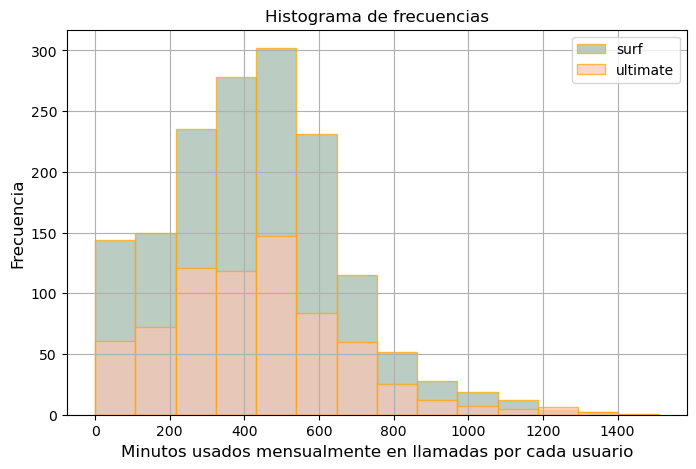

In [45]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plan_surf = user_usage_per_month[user_usage_per_month['plan'] == 'surf']
plan_ultimate = user_usage_per_month[user_usage_per_month['plan'] == 'ultimate']


plan_surf = plan_surf['total_duration']
plan_ultimate = plan_ultimate['total_duration']
data = pd.concat([plan_surf, plan_ultimate], axis = 1)
data.columns = ['surf', 'ultimate']
data.plot(kind = 'hist',
          bins = 14,
          figsize =[8, 5],
          title = 'Histograma de frecuencias',
          legend = ['surf', 'ultimate'],
          edgecolor = 'orange',
          color = ['#9fb7a8', '#fbc6b5'],
          alpha = 0.7,
          grid = True)
plt.legend()
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Minutos usados mensualmente en llamadas por cada usuario', fontsize=12)


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [46]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_duration_stats = user_usage_per_month.groupby('plan')['total_duration'].agg(['mean', 'var'])
print("Media y varianza de la duración mensual de llamada por plan:")
display(call_duration_stats)

Media y varianza de la duración mensual de llamada por plan:


,mean,var
plan,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


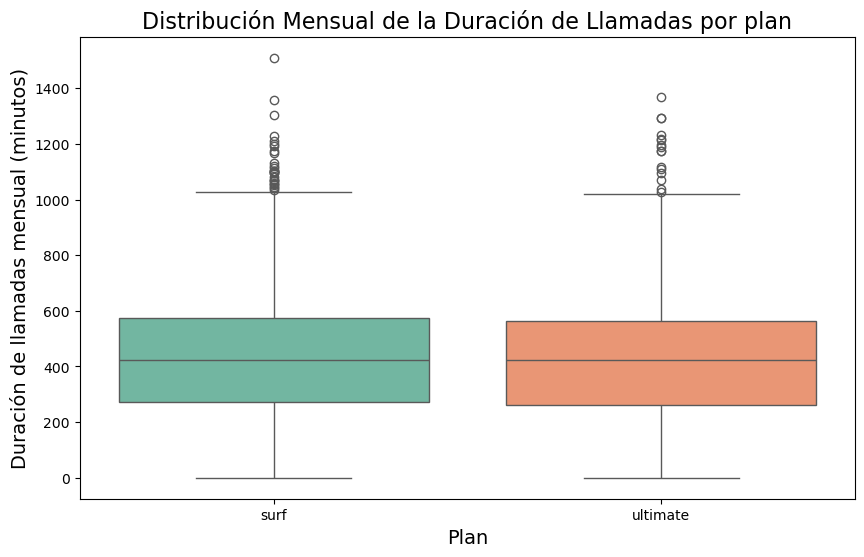

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas# La columna 'call_date' esté en formato datetime y extraer el mes

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='plan', 
    y='total_duration',
    data=user_usage_per_month,
    hue='plan',
    palette="Set2"
)

# Personalizar el gráfico
plt.title('Distribución Mensual de la Duración de Llamadas por plan', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Duración de llamadas mensual (minutos)', fontsize=14)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Observé que la cantidad de minutos consumidos mensualmente difiere según el plan. Los planes presentan una mayor concentración de usuarios con altos volúmenes de minutos, mientras que la distribución es más concentrada en rangos inferiores. Esto indica que la estructura de minutos incluidos y el costo por minuto adicional influyen en la forma en que los usuarios gestionan su consumo.
El análisis de los medios y variación de la duración de las llamadas por plan y mes sugiere que los usuarios no se comportan de manera homogénea. 


### Mensajes

        plan  month  total_messages
0       surf      1       10.500000
1       surf      2       12.000000
2       surf      3       15.260870
3       surf      4       17.400000
4       surf      5       24.012987
5       surf      6       25.298969
6       surf      7       27.033058
7       surf      8       28.777778
8       surf      9       30.762887
9       surf     10       33.839662
10      surf     11       32.385159
11      surf     12       38.600629
12  ultimate      1       15.500000
13  ultimate      2       21.571429
14  ultimate      3       20.250000
15  ultimate      4       22.047619
16  ultimate      5       32.103448
17  ultimate      6       29.340426
18  ultimate      7       32.830508
19  ultimate      8       38.478873
20  ultimate      9       37.895349
21  ultimate     10       39.443396
22  ultimate     11       38.606299
23  ultimate     12       45.006623


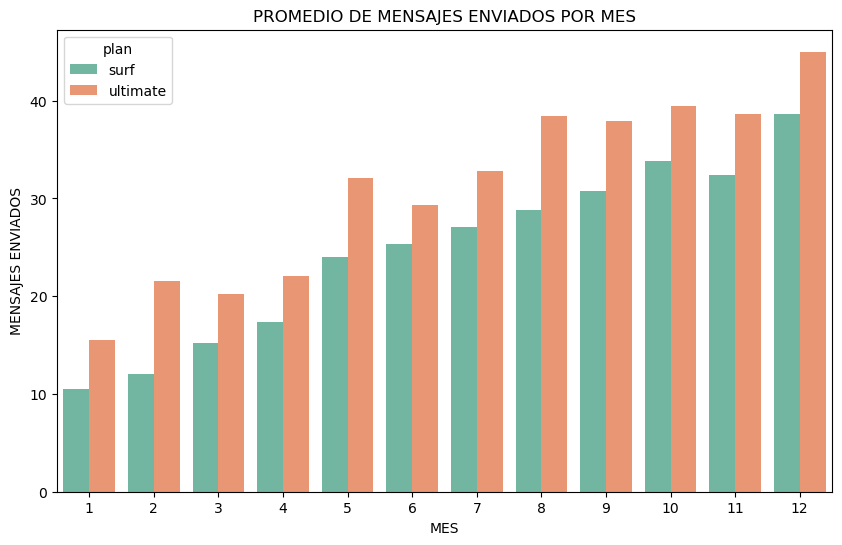

In [48]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

mean_messages = user_usage_per_month.groupby(['plan', 'month'])['total_messages'].mean().reset_index()
print(mean_messages)

#Grafico de barras para la duration promedio de llamadas
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_messages', hue='plan', data=mean_messages, palette="Set2")
plt.title('PROMEDIO DE MENSAJES ENVIADOS POR MES')
plt.xlabel('MES')
plt.ylabel('MENSAJES ENVIADOS')
plt.legend(title='plan')
plt.show()

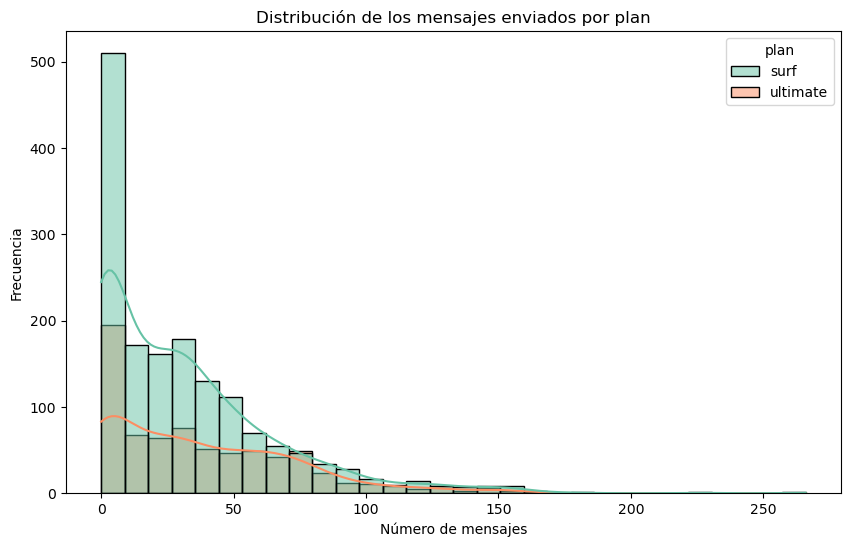

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage_per_month, x='total_messages', hue='plan', kde=True, bins=30, palette="Set2")
plt.title('Distribución de los mensajes enviados por plan')
plt.xlabel('Número de mensajes')
plt.ylabel('Frecuencia')
plt.show()


In [50]:
messages_stats = user_usage_per_month.groupby('plan')['total_messages'].agg(['mean', 'var'])
print(messages_stats)

               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744


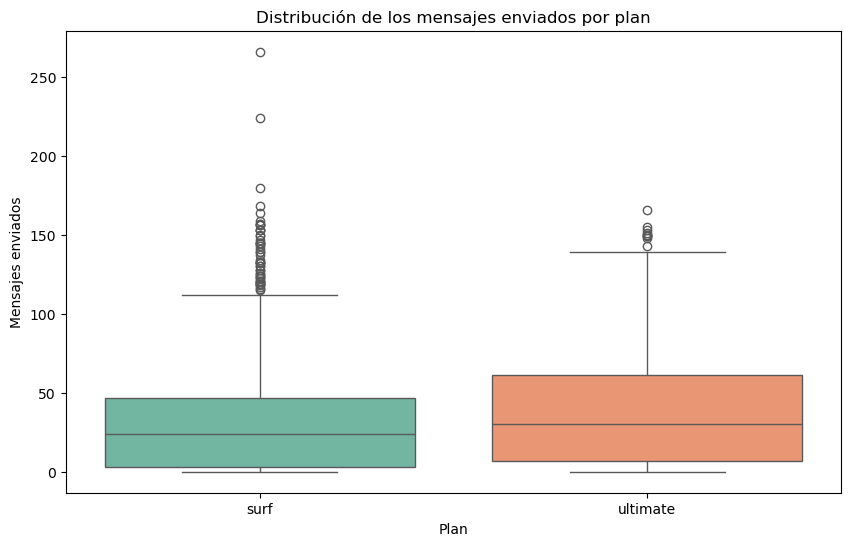

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='plan',
    y='total_messages',
    data=user_usage_per_month,
    hue="plan",
    palette="Set2")
plt.title('Distribución de los mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados')
plt.show()


In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet_usage =user_usage_per_month.groupby('plan').agg({
    'included_gb_per_month': 'first',
    'gb_used': 'sum',
    'excess_gb': 'sum',
    'usd_monthly_pay': 'first'
}).reset_index()

# Mostrar el DataFrame resultante
display(internet_usage)


,plan,included_gb_per_month,gb_used,excess_gb,usd_monthly_pay
0,surf,15,26245.0,6094.0,20
1,ultimate,30,12481.0,240.0,70


Alejandro, ya corregí los datos inventados, me encontraba haciendo pruebas, ya que agregué un tercer plan para ver el comportamiento de la grafica. solamente que ahora no aparece bien. Quedo pendiente de tu feedback. Gracias

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Mayor actividad en planes  superiores:
Los usuarios con plan ultimate suelen disponer de más recursos (como mayor ancho de banda y beneficios adicionales) y, en consecuencia, tienden a intercambiar un mayor volumen de mensajes. Esto puede deberse a que dicho plan facilita el uso de aplicaciones de mensajería integradas o permitan un mayor uso intensivo sin preocupación por limitaciones.

Por otro lado, los usuarios con plan surf, al contar con recursos más limitados, pueden optar por un uso más conservador de los servicios de mensajería.



### Internet

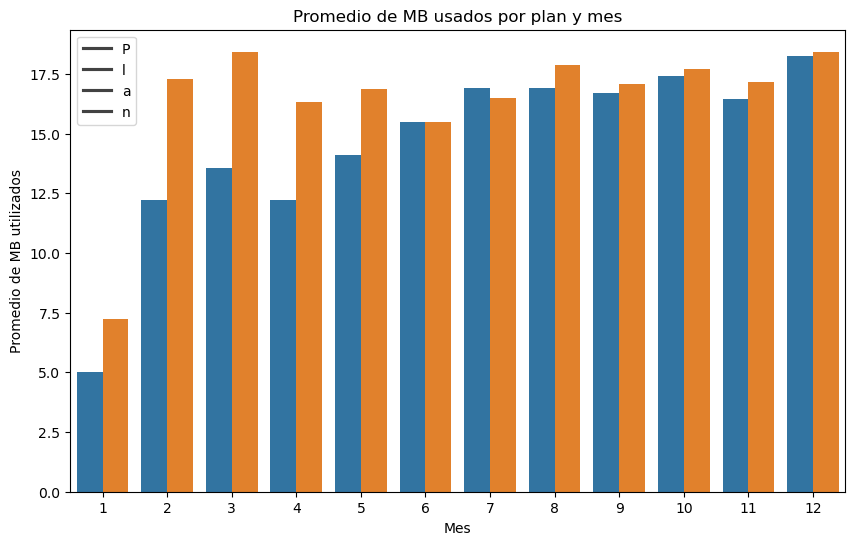

In [53]:
internet_usage = user_usage_per_month.groupby(['plan', 'month'])['gb_used'].mean().reset_index()
# Graficar la comparación en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot (x='month', y='gb_used', hue='plan', data=internet_usage)
plt.title('Promedio de MB usados por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de MB utilizados')
plt.legend("Plan")
plt.show()

In [54]:
internet_stats = user_usage_per_month.groupby('plan').agg({
    'gb_used': ['mean', 'median', 'std']
}).reset_index()

display(internet_stats)

plan    gb_used                 
                  mean median       std
0      surf  16.684679   17.0  7.852067
1  ultimate  17.334722   17.0  7.677282

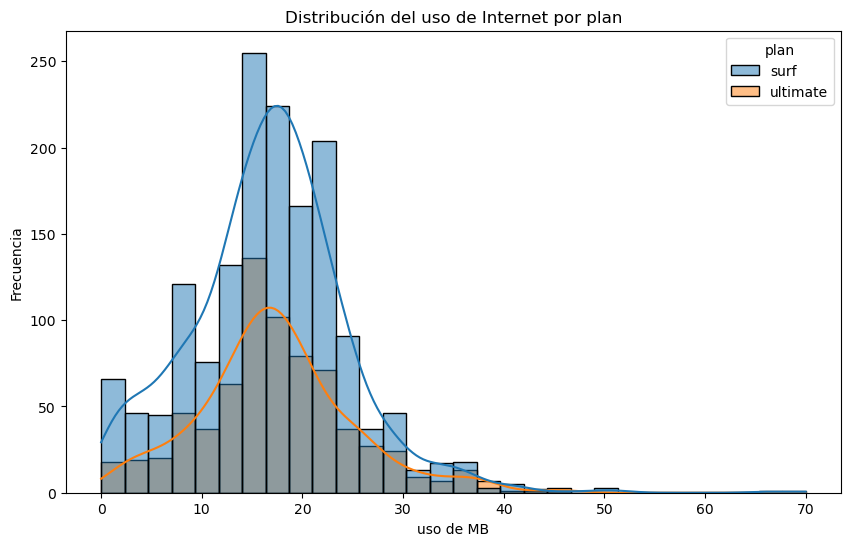

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage_per_month, x='gb_used', hue='plan', kde=True, bins=30)
plt.title('Distribución del uso de Internet por plan')
plt.xlabel('uso de MB')
plt.ylabel('Frecuencia')
plt.show()

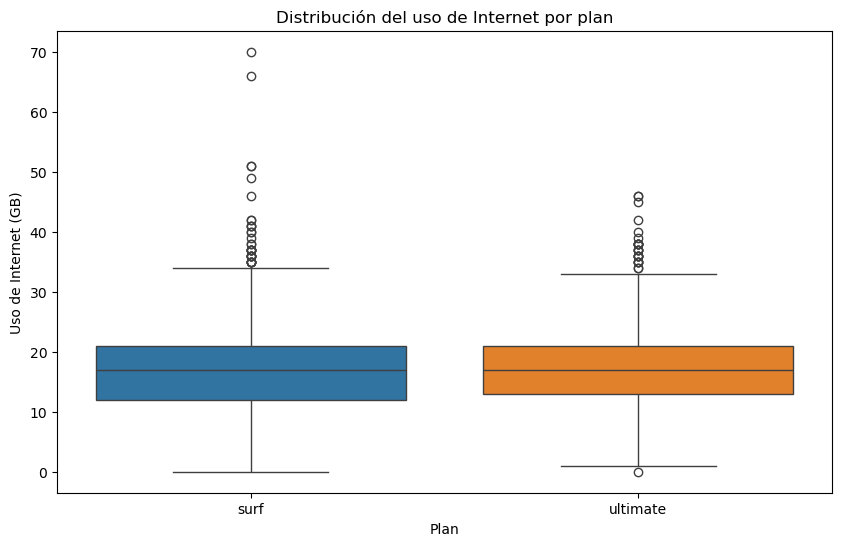

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='gb_used', data=user_usage_per_month, hue="plan")
plt.title('Distribución del uso de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('Uso de Internet (GB)')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

 Los datos muestran que a mayor capacidad del plan, mayor es el tráfico consumido. Esto sugiere que los usuarios que contratan plan Ultimate tienden a aprovechar esa capacidad adicional.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [57]:
# Ingreso promedio por plan
avg_income_per_plan = user_usage_per_month.groupby("plan")["monthly_revenue"].agg(["mean", "std"])
display("Ingresos promedio por plan:", avg_income_per_plan)

'Ingresos promedio por plan:'

,mean,std
plan,,
surf,59.162022,54.708981
ultimate,72.333333,11.498322


C:\Users\ISRAELMARIANA\AppData\Local\Temp\ipykernel_12124\2524499654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_income_per_plan, x=avg_income_per_plan.index, y=avg_income_per_plan["mean"], palette="Set2")


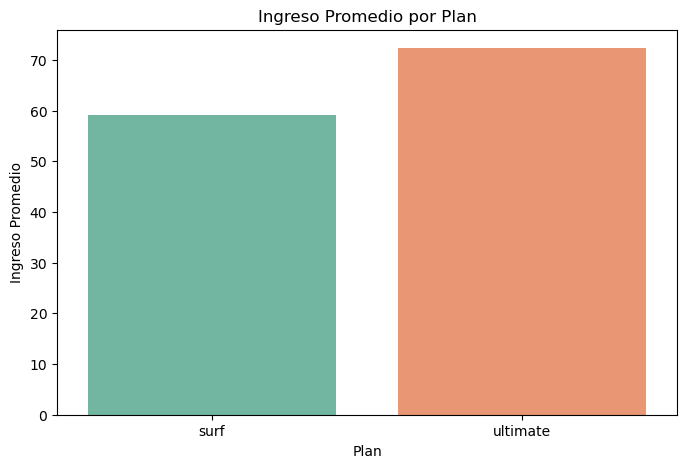

In [58]:
avg_income_per_plan = user_usage_per_month.groupby("plan")["monthly_revenue"].agg(["mean", "median", "std"])

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_income_per_plan, x=avg_income_per_plan.index, y=avg_income_per_plan["mean"], palette="Set2")
plt.xlabel("Plan")
plt.ylabel("Ingreso Promedio")
plt.title("Ingreso Promedio por Plan")
plt.show()

               mean  median        std
plan                                  
surf      59.162022    40.0  54.708981
ultimate  72.333333    70.0  11.498322


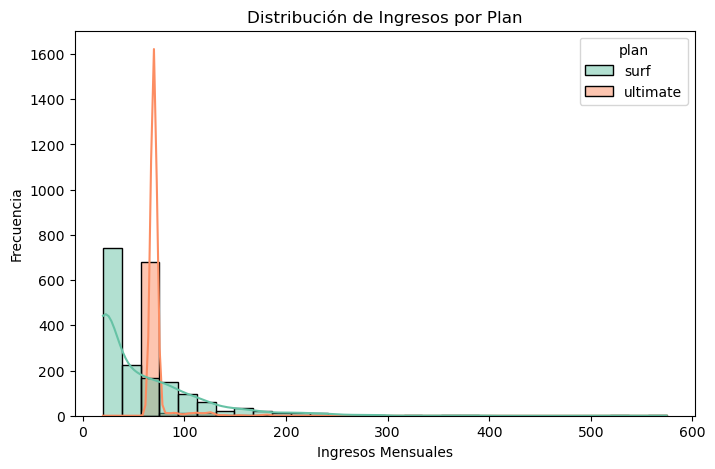

In [59]:
avg_income_per_plan = user_usage_per_month.groupby("plan")["monthly_revenue"].agg(["mean", "median", "std"])
print(avg_income_per_plan)
plt.figure(figsize=(8, 5))
sns.histplot(data=user_usage_per_month, x="monthly_revenue", hue="plan", kde=True, bins=30, palette="Set2")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de Ingresos por Plan")
plt.show()

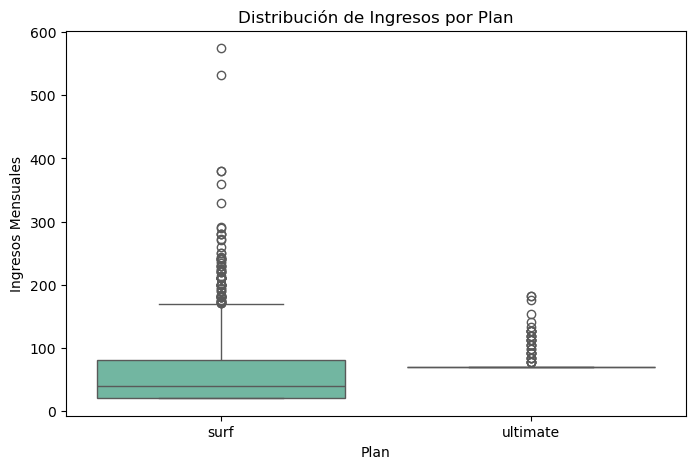

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="plan", y="monthly_revenue", data=user_usage_per_month, hue="plan", palette="Set2")
plt.xlabel("Plan")
plt.ylabel("Ingresos Mensuales")
plt.title("Distribución de Ingresos por Plan")
plt.show()

In [61]:
user_usage_per_month["extra_cost_percentage"] = (
    (user_usage_per_month["additional_minutes_cost"] +
     user_usage_per_month["additional_messages_cost"] +
     user_usage_per_month["additional_gb_cost"])
     / user_usage_per_month["monthly_revenue"]
) * 100

extra_cost_income = user_usage_per_month.groupby("plan")["extra_cost_percentage"].mean()
print("\nPorcentaje de ingresos provenientes de costos adicionales por plan:\n", extra_cost_income)



Porcentaje de ingresos provenientes de costos adicionales por plan:
 plan
surf        40.493536
ultimate     1.905341
Name: extra_cost_percentage, dtype: float64


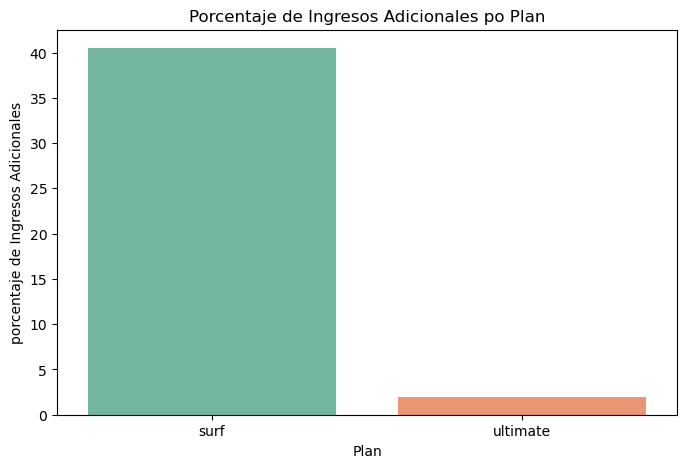

In [62]:
# Convertir la serie en un DataFrame
extra_cost_df = extra_cost_income.reset_index()
extra_cost_df.columns = ["plan", "Porcentaje de Ingresos Adicionales"]

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=extra_cost_df, x="plan", y="Porcentaje de Ingresos Adicionales", hue="plan", palette="Set2")
plt.xlabel("Plan")
plt.ylabel("porcentaje de Ingresos Adicionales")
plt.title("Porcentaje de Ingresos Adicionales po Plan")
plt.show()

In [63]:
extra_cost_df

,plan,Porcentaje de Ingresos Adicionales
0,surf,40.493536
1,ultimate,1.905341


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Los datos muestran que el plan Ultimate genera ingresos significativamente mayores en comparación con el plan Surf. Esto se refleja en los valores más altos de media y mediana del plan Ultimate, lo que indica que los usuarios que optan por este plan están dispuestos a pagar más, probablemente un cambio de mayores beneficios o prestaciones adicionales

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [64]:
# Prueba las hipótesis
plan_monthly_revenue=user_usage_per_month[["plan", "month", 'monthly_revenue']]

# Separar los datos por plan
ultimate_rev = plan_monthly_revenue[plan_monthly_revenue['plan'] =='ultimate']['monthly_revenue']
surf_rev = plan_monthly_revenue[plan_monthly_revenue['plan'] =='surf']['monthly_revenue']

alpha = 0.05
result = levene(ultimate_rev, surf_rev)

if result.pvalue <= alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencica significativa en los ingresos promedio.")

print(f"\n Estadistíco t: {result.statistic:.3f}")
print(f"y el p-valor es {result.pvalue}")


Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.

 Estadistíco t: 410.831
y el p-valor es 3.7511805634303605e-84


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [65]:
ingresos_ny_nj = user_usage_per_month[user_usage_per_month['city_name'] == 'New York']['monthly_revenue']
ingresos_otras_regiones = user_usage_per_month[user_usage_per_month['city_name'] != 'New York']['monthly_revenue']

result = levene(ingresos_ny_nj, ingresos_otras_regiones)
alpha=0.05

if result.pvalue <= alpha:
    print('Se rechaza la hipótesis nula; es decir, la evidencia estadística indica que las varianzas son distintas.')
else:
    print('Se acepta la hipótesis nula; es decir, la evidencia estadística indica  que las varianzas son iguales.')

print(f'\nEl estaditico de prueba es {result.statistic:.3f}) y el p-valor es {result.pvalue}.')


Se acepta la hipótesis nula; es decir, la evidencia estadística indica  que las varianzas son iguales.

El estaditico de prueba es 2.381) y el p-valor es 0.12293894754712811.


In [66]:
ingresos_otras_regiones.describe()

count    1916.000000
mean       64.196733
std        46.685617
min        20.000000
25%        21.200000
50%        70.000000
75%        70.000000
max       574.560000
Name: monthly_revenue, dtype: float64

In [67]:
ingresos_ny_nj.describe()

count    377.000000
mean      58.729231
std       43.227752
min       20.000000
25%       20.000000
50%       50.000000
75%       70.000000
max      280.000000
Name: monthly_revenue, dtype: float64

In [68]:
# Prueba las hipótesis
# Prueba t de Student
t_stats, p_value = st.ttest_ind(ingresos_ny_nj, ingresos_otras_regiones, equal_var=False)

alpha = 0.05

print(f"Estadístico t: {t_stats}")
print(f"Valor p: {p_value}")

# Tomar decisión basada en el valor p
if p_value <= alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia significativa en los ingresos promedio.")
    

Estadístico t: -2.2147888693871285
Valor p: 0.027174468935040517
Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Wow, vaya que ha sido un proyecto bastante retador, pude analizar el plan ultimate y surf, en cada sección logré identificar como los usuarios eligen cuidar sus datos, su bolsillo, el cuidado o despilfarro de GB dependiendo de sus necesidades; diseñé un plan ampliamente detallado para que estadisticamente cada dato fuera analizado y descrito de la manera más precisa posible, me hizo consciente sobre que debo cambiar de compañia telefónica y no dar por sentado ni conformarme con lo básico, quiero más ya que soy merecedor de los datos y GB para así continuar y aprovechar de toda la información cuántica que está disponible para mi, este proyecto me motivó.
Gracias revisór por tu arduo trabajo y darme tu retroalimentación, ya que la espero con ansias. Gracias